In [1]:
import pickle
import torch
import os
import time
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from Gym_Dataset import Gym_Dataset
from torch.utils.data import Dataset

from VAE import VAE
from VAE import VAE_DataSet
from VAE_Trainer import VAE_Trainer

from MDN_RNN import MDN_RNN
from MDN_RNN import MDN_RNN_DataSet
from MDN_RNN_Trainer import MDN_RNN_Trainer

from MDN import MDN
%matplotlib inline

In [1]:
dataset_name = "CarRacing-v0_VAE_Z_dataset"
dataset_path = "D:\\Implementation_Schmidhuber" +"\\" + dataset_name
mdn_rnn_trainer = MDN_RNN_Trainer(dataset_path,35,32)
loss = mdn_rnn_trainer.train(50)

torch.Size([1, 1000, 35])


D:\Implementation_Schmidhuber\MDN_RNN.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_mu = torch.tensor(data["mu"], dtype=torch.float)
D:\Implementation_Schmidhuber\MDN_RNN.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_logvar = torch.tensor(data["logvar"], dtype=torch.float)
D:\Implementation_Schmidhuber\MDN_RNN.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_actions = torch.tensor(data["actions"], dtype=torch.float)[0]


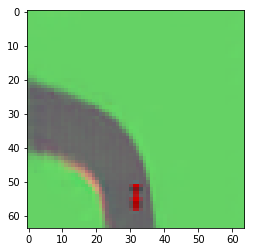

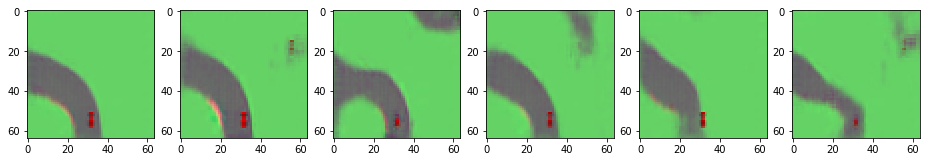

In [34]:
vae  = torch.load("D:\\Implementation_Schmidhuber\\vae.pt")#vae_trainer.get_model()
vae.eval()

frame = 444
seq = 5

dataset = MDN_RNN_DataSet(dataset_path)
dl = DataLoader(dataset, batch_size=1, shuffle=True)
for i, eps_data in enumerate(dl):
    print(eps_data.shape)
    x_rnn = eps_data[0][frame:frame+seq].reshape(1,seq,35)
    x_rnn[:,:,-1] = 0
    x_rnn[:,:,-2] = 0
    x_rnn[:,:,-3] = 0
    x_vae = eps_data[0][frame][0:32].reshape(1,32)
    x_hat = vae.decode(x_vae.cuda()).permute(0,2,3,1).cpu().detach().numpy()[0]
    plt.imshow(x_hat)
    mdn_rnn_trainer.predict(x_rnn, vae)
    break

In [4]:
mdn_rnn_trainer.save_model("D:\\Implementation_Schmidhuber\\mdn_rnn.pt")